# training histories

## for "fine-tuning" AlexNet

### on feature visual search stimuli (red v. green vertical rectangle) 

In [2]:
import os
from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('bmh')

plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

In [50]:
def plot_train_history(acc_dir, set_sizes=(1,2,4,8), save_as=None):
    acc_txt_files = glob(os.path.join(acc_dir, '*.txt'))
    
    num_rows = len(acc_txt_files) / 3
    num_rows = int(np.ceil(num_rows))
    
    fig, ax = plt.subplots(num_rows, 3)
    fig.set_size_inches(15, 10)
    ax = ax.ravel()
    for ax_ind, acc_txt_file in enumerate(acc_txt_files):
        acc = np.loadtxt(acc_txt_file, delimiter=',')
        rows = acc.shape[0]
        for set_size, col in zip(set_sizes, acc.T):
            ax[ax_ind].plot(np.arange(rows), col, label=f"set_size: {set_size}")
        ax[ax_ind].set_title(f"replicate {ax_ind + 1}")
        ax[ax_ind].set_ylabel("acc")
        ax[ax_ind].set_xlabel("epoch")
        ax[ax_ind].legend(loc='lower right')
    
    if ax.shape[0] > len(acc_txt_files):
        extra = ax.shape[0] - len(acc_txt_files)
        for ind in range(1, extra+1):
            ax[-ind].set_visible(False)
    
    fig.tight_layout()
    if save_as:
        plt.savefig(save_as)

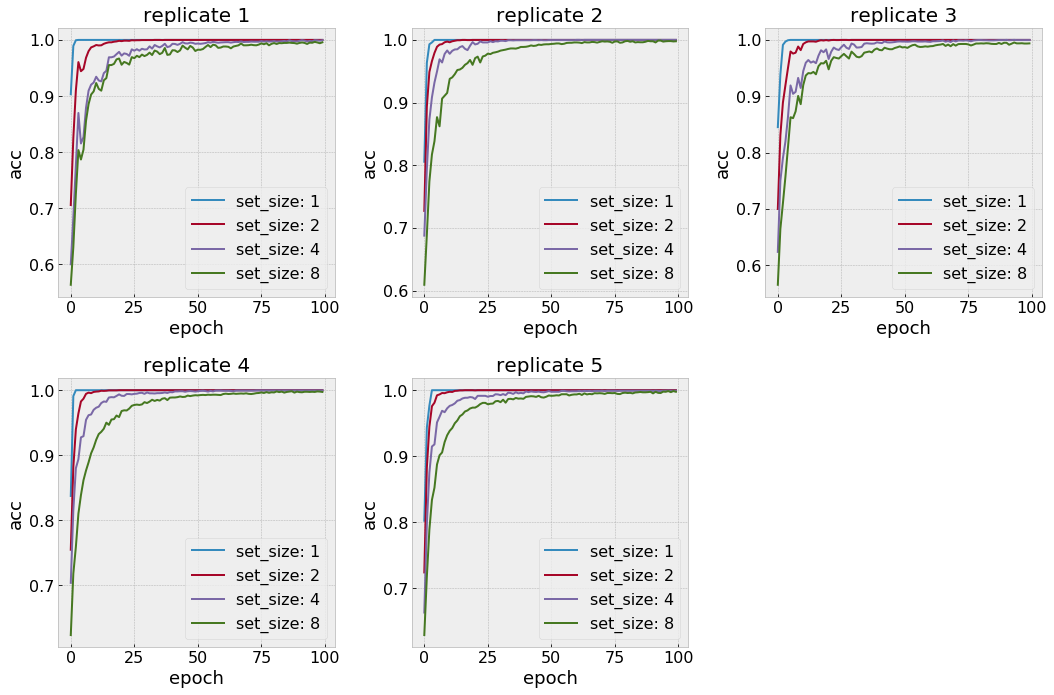

In [54]:
acc_dir = '/home/bart/Documents/repos/L2M/visual-search-nets/data/experiment_7_acc_by_epoch_by_set_size/checkpoints/feature_search_alexnet_models/acc_by_epoch_by_set_size'
plot_train_history(acc_dir, save_as='train-history-alexnet-feature-lr0.00001.png')

### on spatial configuration search (digital 2 v. 5)

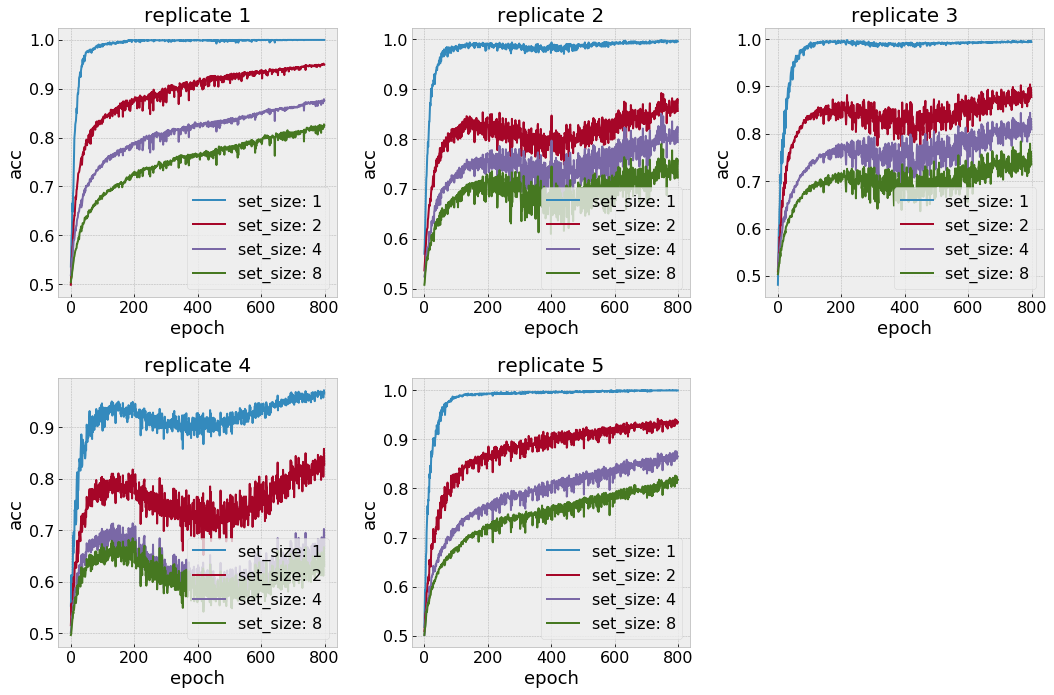

In [55]:
acc_dir = '/home/bart/Documents/repos/L2M/visual-search-nets/data/experiment_7_acc_by_epoch_by_set_size/checkpoints/spatial_config_search_alexnet_models/acc_by_epoch_by_set_size'
plot_train_history(acc_dir, save_as='train-history-alexnet-spatial-lr0.00001.png')

## freezing layers with weights pre-trained on ImageNet, and using a high learning rate
### spatial configuration search (digital 2 v. 5)

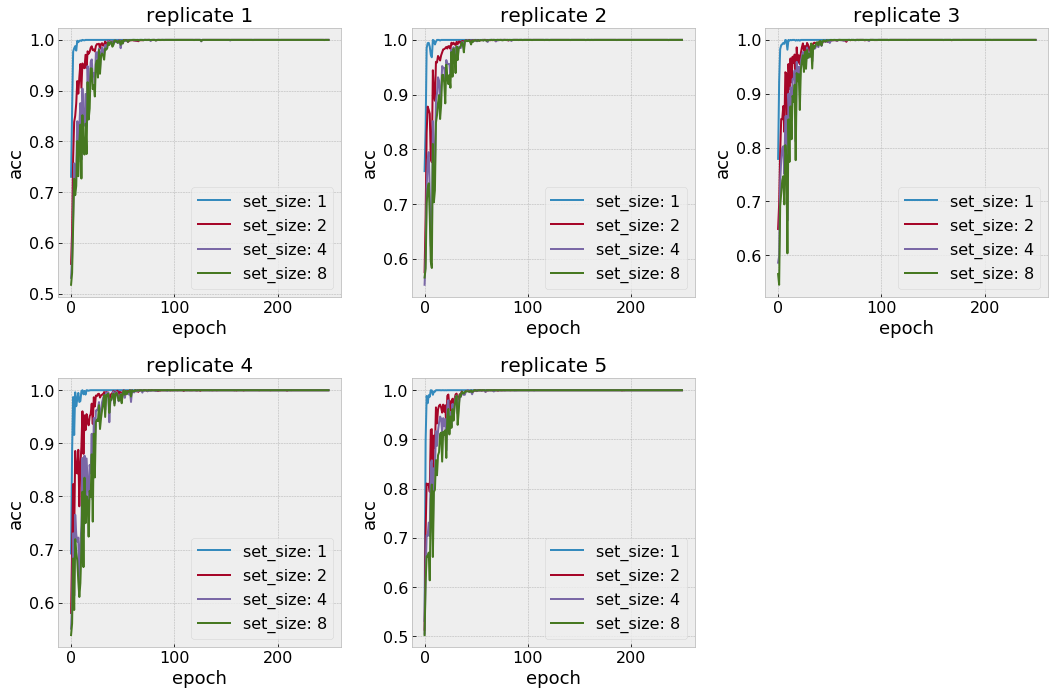

In [56]:
acc_dir = '/home/bart/Documents/repos/L2M/visual-search-nets/data/experiment_8_high_LR/checkpoints/spatial_config_search_alexnet_models/acc_by_epoch_by_set_size'
plot_train_history(acc_dir, save_as='train-history-alexnet-spatial-lr0.001.png')